In [27]:

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### <font color= green> Calculad las métricas para vuestro modelo

### <font color=violet> Ajuste del modelo con variables codificadas y estandarizadas

In [28]:
df_esta = pd.read_pickle("Datos/Travel_Insurance_esta_enco.pkl")
df_esta.head()

,Travel_Insurance,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.0,0.426113,-1.482446,0,1,0,0,4,1
1,0.0,0.426113,0.874835,1,1,0,0,5,0
2,1.0,1.453557,-1.205119,1,1,0,0,2,1
3,0.0,-0.601330,-0.650464,1,1,0,0,1,1
4,0.0,-0.601330,-0.650464,1,1,1,0,6,1


In [29]:
# separamos los datos en X e y

X1 = df_esta.drop("Travel_Insurance", axis = 1)
y1 = df_esta["Travel_Insurance"]

In [30]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X1.head()

,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,0.426113,-1.482446,0,1,0,0,4,1
1,0.426113,0.874835,1,1,0,0,5,0
2,1.453557,-1.205119,1,1,0,0,2,1
3,-0.601330,-0.650464,1,1,0,0,1,1
4,-0.601330,-0.650464,1,1,1,0,6,1


In [31]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta

y1.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Travel_Insurance, dtype: float64

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [33]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [34]:
# Sacamos la matriz de confusión:

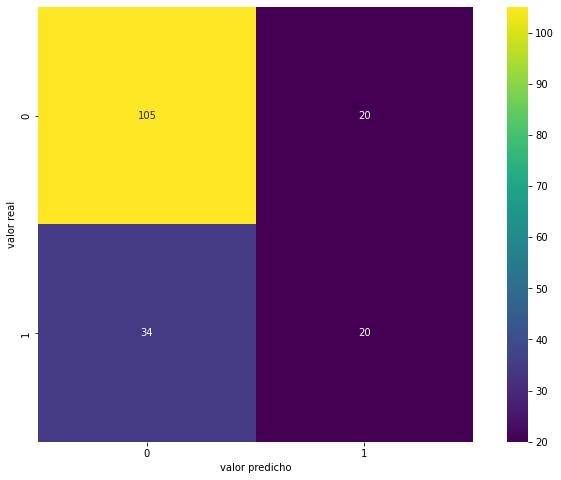

In [35]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [36]:
# vamos a hacernos una función para sacar las métricas:


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [37]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.698324,0.500000,0.370370,0.425532,0.227091,test,Regresión logistica Esta
1,0.695225,0.722973,0.378092,0.496520,0.307480,train,Regresión logistica Esta


### <font color=violet> Realización del modelo con variables codificadas

In [38]:
df = pd.read_pickle("Datos/Travel_Insurance_enco.pkl")
df.head()

,Age,Annual_Income,Travel_Insurance,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,31,400000,0,0,1,0,0,4,1
1,31,1250000,0,1,1,0,0,5,0
2,34,500000,1,1,1,0,0,2,1
3,28,700000,0,1,1,0,0,1,1
4,28,700000,0,1,1,1,0,6,1


In [39]:
# separamos los datos en X e y

X2 = df.drop("Travel_Insurance", axis = 1)
y2 = df["Travel_Insurance"]

In [40]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras

X2.head()

,Age,Annual_Income,Employment_Type_le,Graduate_Or_Not_le,Frequent_Flyer_le,Ever_Travelled_Abroad_le,Family_Members_le,Chronic_Diseases_le
0,31,400000,0,1,0,0,4,1
1,31,1250000,1,1,0,0,5,0
2,34,500000,1,1,0,0,2,1
3,28,700000,1,1,0,0,1,1
4,28,700000,1,1,1,0,6,1


In [41]:
y2.head()

0    0
1    0
2    1
3    0
4    0
Name: Travel_Insurance, dtype: int64

In [42]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [43]:
# Ajuste y predicción de modelo:

In [44]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg_esta.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg_esta.predict(x_test2)

In [45]:
# Sacamos la matriz de confusión:

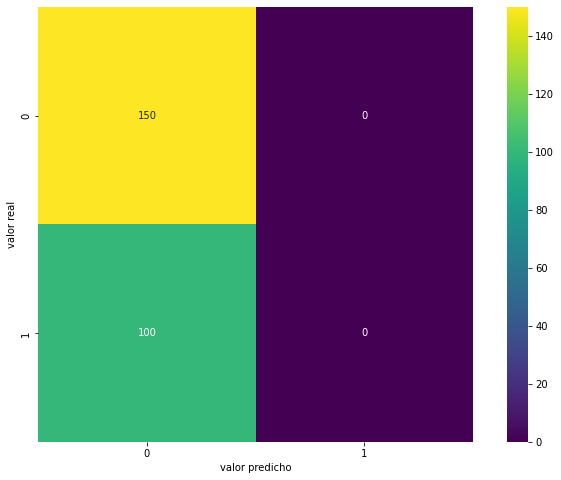

In [46]:
mat_lr = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [47]:
results_logistic = metricas(y_test2, y_pred_test, y_train2, y_pred_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.600000,0.0,0.0,0.0,0.0,test,Regresión logistica
1,0.616617,0.0,0.0,0.0,0.0,train,Regresión logistica


### <font color= green> Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

Juntamos los dos dataframes de las métricas que hemos creado:

In [48]:
resultados_todo = pd.concat([results_logistic, results_logistic_esta], axis = 0)
resultados_todo

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.600000,0.000000,0.000000,0.000000,0.000000,test,Regresión logistica
1,0.616617,0.000000,0.000000,0.000000,0.000000,train,Regresión logistica
0,0.698324,0.500000,0.370370,0.425532,0.227091,test,Regresión logistica Esta
1,0.695225,0.722973,0.378092,0.496520,0.307480,train,Regresión logistica Esta


Interpretamos los resultados de nuestras variables codificadas:
- Accuracy: nuestro modelo acierta el 60% de las veces.
- Precisión: nuestro modelo se quivocará un 0% de las veces de si un usuario tiene seguro de viaje o no.
- Recall: nuestro modelo es capaz de identificar un 0% de los usuarios con seguro de viajes.
- Kappa: al ser un valor de 0 nos indica que está acertando en sus predicciones totalmente al azar

Interpretamos los resultados de nuestras variables ajustadas y codificadas:
- Accuracy: nuestro modelo acierta el 70% de las veces.
- Precisión: nuestro modelo se quivocará un 50% de las veces de si un usuario tiene seguro de viaje o no.
- Recall: nuestro modelo es capaz de identificar un 37% de los usuarios con seguro de viajes.
- Kappa: al ser un valor de 0.22 significa que la concordancia de nuestros datos es baja, nos indica que está acertando en sus predicciones un poco al azar.

OVERFITTING Y UNDERFITTING:

- En cambio en la regresión logistica no podemos decir que tengamos overfitting ni underfitting, ya que de hecho, nuestros valores son de 0, menos en el accuracy.
- En la regresión logistica estadistica si que podemos decir que tenemos ovverfittings en la precisión, f1 y kappa.

En conclusión podemos decir que no tenemos un buen modelo ya que tenemos overfitting y que nuestros resultados con respecto al train no son los correctos

In [50]:
# guardemos este dataframe con los resultados en un csv para compararlo con otros modelos como hicimos en regresión lineal

resultados_todo.to_pickle("resultados_Travel_Insurance_logistica.pkl")